# Fitting ARCS t0 data with LMFIT

The ! allows you to run a system command from the command line.  Let's use ls to see what is in the Data/Fitting directory.

In [1]:
cd ~vua/chopper_parameters/

[Errno 13] Permission denied: '/SNS/users/vua/chopper_parameters/'
/SNS/users/lj7/dv/sns-chops/detcalib/ARCS


In [2]:
!ls 

ARCS_t0_fit.pdf
ARCS_t0_fitting.ipynb
chopper_calculations_2013-B.xlsx
chopper_calculations_2014-A.xlsx
chopper_calculations_2014-B.xlsx
chopper_calculations_2015-A.xlsx
chopper_calculations_2015-B.xlsx
chopper_calculations_2016-A.xlsx
chopper_calculations_2016-B.xlsx
chopper_calculations_2017-A.xlsx
~$chopper_calculations_2017-B_newFermi.xlsx
chopper_calculations_2017-B_newFermi.xlsx
chopperconfig_700-0.5-AST_100-1.5-SMI_2012_02_29.xml
chopperconfig_700-1.5-SMI_100-1.5-SMI_2012_11_27.xml
chopperconfig_original_ARCS_2011_06_20.txt
chopperconfig_SEQ_100_Ch1_2011_06_20.txt
chopperconfig.xml
experiment_log_2013-B.csv
experiment_log_2014-A.csv
experiment_log_2014-B.csv
experiment_log_2015-A.csv
experiment_log_2015-B.csv
experiment_log_2016-A.csv
experiment_log_2016-B.csv
experiment_log_2017-A.csv
experiment_log_2017-B.csv
experiment_summary_2013_A.csv
experiment_summary_2013-B.csv
plot_2017-B_newFermi.pdf
t0_2017-B_newFermi.txt
t0_Efit_2017-B_newFermi.txt
t0_fit_results.txt


Let's use the system command cat to see what is in the file

In [3]:
!cat t0_Efit_2017-B_newFermi.txt

It is always good practice to import your libraries at the top of the file.  

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model

Now load the data using the genfrom txt command.  Let's copy and paste the header names

In [5]:
# see https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.genfromtxt.html

headers = "CalculatedEi	CalculatedT0"
# Note that by default, any consecutive whitespaces act as delimiter. 
data = np.genfromtxt('t0_Efit_2017-B_newFermi.txt', names=headers.split())
data

array([(   40.46597563,  42.27481535), (   60.68073945,  34.05796901),
       (   81.01163942,  30.54471335), (  131.026475  ,  18.63375578),
       (  160.955778  ,  14.42674585), (   50.60173903,  38.60738299),
       (   70.98064373,  35.26128778), (  111.041264  ,  22.7590724 ),
       (  200.6425523 ,  10.54976429), (   50.5653717 ,  37.29415215),
       (   70.83847166,  32.21859564), (  100.9077413 ,  23.37886925),
       (  130.7780005 ,  16.77860734), (  200.5531543 ,  10.54270187),
       (   60.64652644,  33.55293672), (   85.96118543,  27.90408835),
       (  110.8929652 ,  21.07185938), (  301.1001869 ,   9.27482488),
       (   90.87379478,  25.60606286), (  130.6997447 ,  16.31105336),
       (  175.4986064 ,  11.36835606), (  276.0259883 ,   9.44465045),
       (  351.0472402 ,   8.4256221 ), (  110.7215565 ,  19.37326875),
       (  150.696127  ,  13.67071849), (  225.4303108 ,   9.23183281),
       (  501.7249868 ,   6.99709306), (  125.8381124 ,  17.76894307),
      

If you want to see the list of names that can access the array use the dtype.names method

In [6]:
data.dtype.names

('CalculatedEi', 'CalculatedT0')

In [7]:
data.sort()
data

array([(    8.01066899,  48.08381402), (    8.01302184,  50.697699  ),
       (    9.0424196 ,  55.35232693), (   10.02477338,  44.10727727),
       (   10.03427302,  51.42942588), (   12.04864582,  47.94787574),
       (   12.06019234,  51.95493907), (   12.07476863,  51.28565247),
       (   14.06917579,  44.90025488), (   14.07523473,  48.19344589),
       (   14.07868683,  46.07258795), (   16.02219917,  32.03919291),
       (   16.08850981,  45.68461745), (   16.09511481,  47.3022602 ),
       (   16.12015902,  47.24492562), (   18.12898791,  48.21533357),
       (   20.1190654 ,  40.45496987), (   20.13517394,  42.46291888),
       (   20.16576345,  48.63700344), (   20.18024081,  48.22110836),
       (   25.10856136,  33.23868802), (   25.1774339 ,  40.91044366),
       (   25.19466097,  42.86304324), (   25.21322473,  44.47213744),
       (   25.27332638,  46.46767192), (   30.21899583,  35.70121205),
       (   30.2605202 ,  38.60416717), (   30.28548948,  40.90889112),
      

# Plotting

Note in the metadata the default columns to plot

```
# def_x = k
# def_y = detector_1
```

<IPython.core.display.Javascript object>


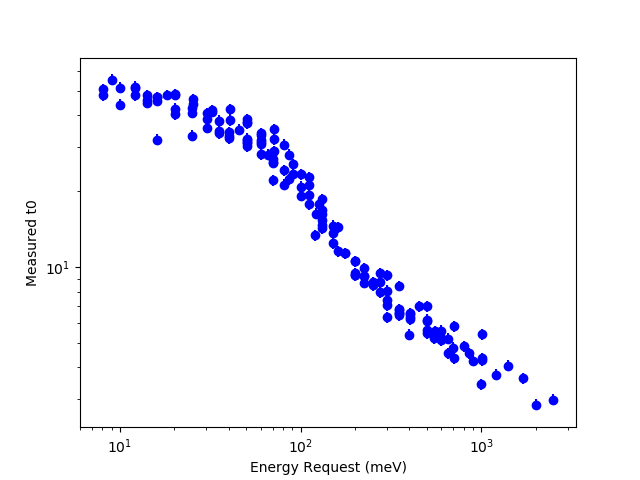

Text(0.5,0,'Energy Request (meV)')

In [12]:
f,ax=plt.subplots()
data_x = data['CalculatedEi']
data_y = data['CalculatedT0']
data_err=0.05*data_y  # a guess 
ax.errorbar(data_x, data_y,yerr=(data_err),fmt='bo')
#ax.semilogx()
ax.loglog()
ax.set_ylabel('Measured t0')
ax.set_xlabel('Energy Request (meV)')

# Fitting


For fitting we will use the LMFIT package.

First we define a fuction.
Note the Python Syntax is

```def <function name> (<params>):
    '''
    <documentation string>
    '''
    <code>
    return <value>```

In [9]:
def t0_function(x, t_off, A_lo, p_lo, A_hi, p_hi, Ecross, Wcross):
    '''
    Fit emission times at low and high incident energy using a crossover function
    Model low and high parts as power laws
    Using tanh() with a crossover energy and width
    x: Incident energy in meV
    t_off: Constant offset
    A_lo,p_lo: Amplitude and power for low energy part
    A_hi,p_hi: Amplitude and power for high energy part
    Ecross: crossover energy
    Wcross: crossover width
    '''
    f_hi = 0.5*(1. + np.tanh((x - Ecross)/Wcross))
    f_lo = 1.-f_hi
    g_hi = A_hi*np.power(x,p_hi)
    g_lo = A_lo*np.power(x,p_lo)
    
    return t_off + f_lo*g_lo + f_hi*g_hi

<IPython.core.display.Javascript object>


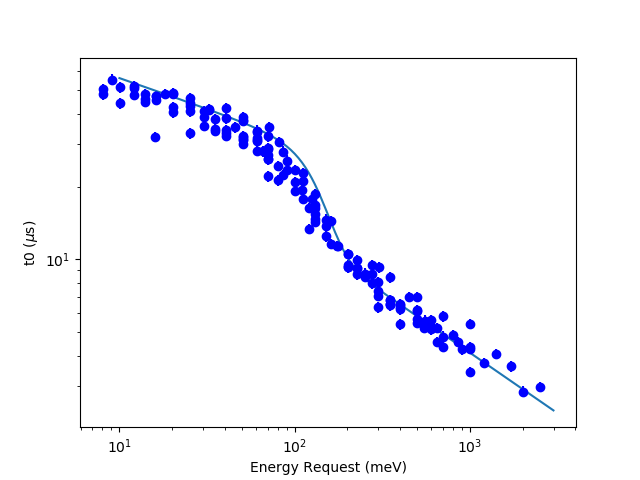

Text(0.5,0,'Energy Request (meV)')

In [10]:
# Let's plot this function to see what it looks like
x = np.arange(10.0, 3000, 5)
y = t0_function(x, 0, 100, -0.25, 130,-0.5,130,50)
f2,ax2=plt.subplots()
ax2.plot(x,y)
ax2.loglog()
# Plot data to compare
ax2.errorbar(data_x, data_y,yerr=(data_err),fmt='bo')
ax2.set_ylabel('t0 ($\mu$s)')
ax2.set_xlabel('Energy Request (meV)')

## LMFit

Non-Linear Least-Squares Minimization and Curve-Fitting

Very powerful that has many options. 

We will do a simple gaussian fit.

See: See: https://lmfit.github.io

First we need to declare the Model.  By Declaring the Model LMFIT does some nice things for us.

1) it assumes the first parameter is the independent variable

2) it assumes the rest of the parameters are parameters and it takes care of keeping track of the parameter names

In [10]:

gmodel = Model(t0_function)

type gmodel. ```<tab>``` to see what methods are available on gmodel

In [11]:
# Nice things
print(gmodel.param_names)
print(gmodel.independent_vars)

['t_off', 'A_lo', 'p_lo', 'A_hi', 'p_hi', 'Ecross', 'Wcross']
['x']


In order to do the fit we will need some initial parameters.  So we will plot the figure again

To do the fit use the gmodel.fit method.  press ```<shift>+<tab>``` when the cursor is inside the parenthesis to see more info. Since we have weights, we will use them. Return the results of the fit into result

In [41]:
params = gmodel.make_params()
params.add('t_off',value=0.0,vary=True)
params.add('A_lo',value=100.0,vary=True, min=0.0)
params.add('p_lo',value=-0.1,vary=False)
params.add('A_hi',value=100.0,vary=True, min=0.0)
params.add('p_hi',value=-0.5,vary=False)
params.add('Ecross',value=130.0,vary=True, min=0.0)
params.add('Wcross',value=50.0,vary=True, min=0.0)
print(params)
params['t_off'].vary


Parameters([('t_off', <Parameter 't_off', 0.0, bounds=[-inf:inf]>), ('A_lo', <Parameter 'A_lo', 100.0, bounds=[0.0:inf]>), ('p_lo', <Parameter 'p_lo', value=-0.1 (fixed), bounds=[-inf:inf]>), ('A_hi', <Parameter 'A_hi', 100.0, bounds=[0.0:inf]>), ('p_hi', <Parameter 'p_hi', value=-0.5 (fixed), bounds=[-inf:inf]>), ('Ecross', <Parameter 'Ecross', 130.0, bounds=[0.0:inf]>), ('Wcross', <Parameter 'Wcross', 50.0, bounds=[0.0:inf]>)])


True

In [42]:
# Fitting
result = gmodel.fit(data_y, x=data_x, params=params, weights=1./data_err)

type result. ```<tab>``` to see the methods available for the results. A nice overview is given if you print(result.fit_report())

In [44]:
print(result.fit_report())

[[Model]]
    Model(t0_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 150
    # variables        = 5
    chi-square         = 601.582779
    reduced chi-square = 4.14884675
    Akaike info crit   = 218.339328
    Bayesian info crit = 233.392504
[[Variables]]
    t_off:   0.37039992 +/- 0.27028871 (72.97%) (init = 0)
    A_lo:    63.7810912 +/- 2.59843792 (4.07%) (init = 100)
    p_lo:   -0.1 (fixed)
    A_hi:    121.432522 +/- 6.85659967 (5.65%) (init = 100)
    p_hi:   -0.5 (fixed)
    Ecross:  65.8030518 +/- 6.60758717 (10.04%) (init = 130)
    Wcross:  80.6125095 +/- 7.85095173 (9.74%) (init = 50)
[[Correlations]] (unreported correlations are < 0.100)
    C(t_off, A_hi)    = -0.959
    C(A_lo, Ecross)   = -0.909
    C(A_lo, Wcross)   =  0.753
    C(Ecross, Wcross) = -0.746
    C(A_hi, Wcross)   = -0.538
    C(t_off, Wcross)  =  0.460
    C(A_lo, A_hi)     = -0.316
    C(t_off, A_lo)    =  0.262
    C(A_hi, Ecross)  

Now let's make a plot of the fit results, the data and the difference curve.
This time subplot will produce an axis handle that is an array of two items one for data and the fit and one for the difference.

<IPython.core.display.Javascript object>


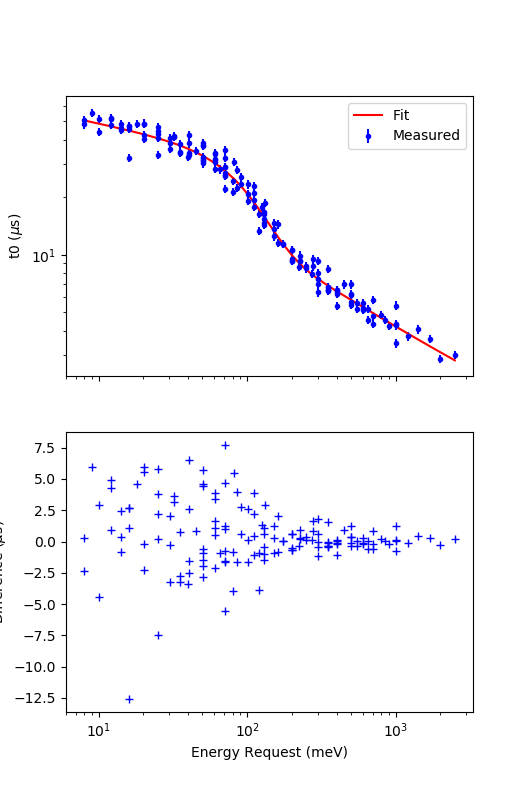

Text(0,0.5,'Difference ($\\mu$s)')

In [45]:
f2,ax2=plt.subplots(nrows=2,ncols=1,sharex=True, figsize=(5,8))
ax2[0].errorbar(data_x,data_y,yerr=data_err,fmt='bo',label="Measured",markersize=3)
ax2[0].plot(data_x, result.best_fit, 'r-',label="Fit")
ax2[0].loglog()
ax2[0].legend()
ax2[0].set_ylabel('t0 ($\mu$s)')

#ax2[1].plot(data_x,result.residual)
ax2[1].plot(data_x,data_y-result.best_fit,'b+')
ax2[1].semilogx()
ax2[1].set_xlabel('Energy Request (meV)')
ax2[1].set_ylabel('Difference ($\mu$s)')
#plt.figtext(0.0,0.1,result.fit_report())

In [16]:
ax2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116a9a358>,
      dtype=object)

To save my nice figure I use.

In [79]:
f2.savefig('ARCS_t0_fit.pdf')

In [81]:
fp = open('./t0_fit_results.txt','w')
fp.write(result.fit_report())
fp.close()

In [84]:
t0_function(help)

TypeError: t0_function() missing 7 required positional arguments: 't_off', 'A_lo', 'p_lo', 'A_hi', 'p_hi', 'Ecross', and 'Wcross'

In [31]:
from scipy.special import erf,erfc
erf([-2.0,0,2.0])

array([-0.99532227,  0.        ,  0.99532227])

<IPython.core.display.Javascript object>


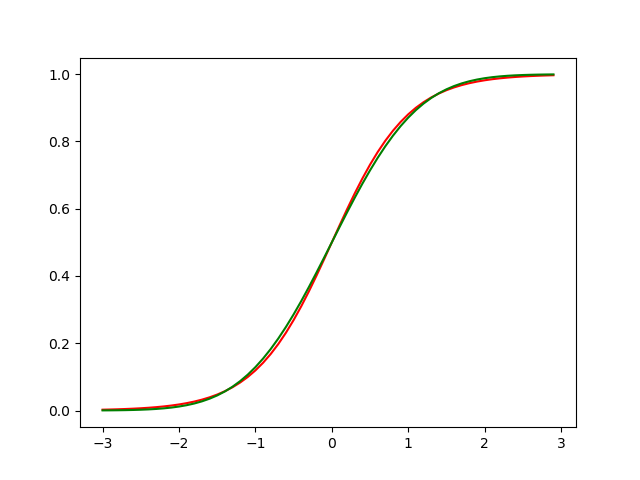

In [30]:
f3,ax3 = plt.subplots()
xd = np.arange(-3.,3,0.1)
ax3.plot(xd,0.5*(1.+np.tanh(xd)),'r-')
ax3.plot(xd,0.5*(1.+erf(xd/1.25)),'g-')